# InClass exercises (randomization and bootstrapping)


## First start by importing the packages you'll need. 
* Numpy, scipy, and matplotlib


In [1]:
import numpy as np
from scipy import stats  # has t-tests and other stats stuff...
import matplotlib.pyplot as plt

## Part I: Start with some data. This is a slightly modified part of the Anscombe data set
* First plot it
* Then compute the correlation coeffecient that relates the two arrays
* Then the t-value and p-value associated with the correlation. 

In [2]:
d1 = np.array([8.1, 8.01, 7.8, 7.85, 8.21, 8.11, 7.95, 12.5, 8.05, 7.98, 8.13])
d2 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 19, 5.56, 7.91, 6.89])

## Ok - now scatterplot the data

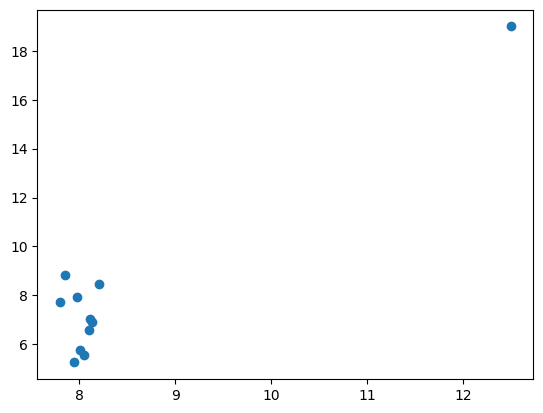

In [3]:
N = d1.size
plt.scatter(d1, d2)
plt.show()

## Based on this plot, what do you think is going to happen when we compare the output from a parametric test and a radomization test?
* First compute parametric correlation coef and p-value...

In [4]:
# parametric correlation coeffecient
rval, pval = stats.pearsonr(d1, d2)

nrand = 10000
corr = np.zeros(nrand)
new_d1 = np.zeros(N)
new_d2 = np.zeros(N)

for i in range(nrand):
    for j in np.arange(N):   
        if np.random.rand(1) < .5:
            new_d1[j] = d1[j]
            new_d2[j] = d2[j]
        else:
            new_d1[j] = d2[j]
            new_d2[j] = d1[j]

    corr[i], _ = stats.pearsonr(new_d1, new_d2)

null_p = 2 * (np.sum(corr > rval) / nrand)
print('Randomization-based p-value: ', null_p, ' Parametric P-value: ', pval)

Randomization-based p-value:  0.0216  Parametric P-value:  1.2498961305090947e-05


## Now use randomization testing to put a (slightly) better p-value on the data...
* Run 10000 iterations of the randomization test to evalute how likely your correltation value is under the assumption that your condition label makes no difference (ie. that your manipulation is meaningless)
* On each iteration randomly decide if each data point is assigned to one condition or the other
    * One easy way to do this is to flip a coin to determine assignment of each data point (e.g. `if np.random.rand() < .5` then assign a data point to condition 1, otherwise to condition 2
* then re-compute correlation on each iteration
* then compare the distribution of p values under the null to your obtained p-value

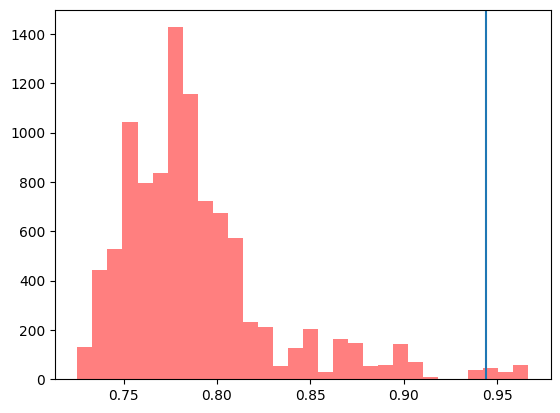

In [5]:
plt.hist(corr, bins=30, color='r', alpha=0.5)
plt.axvline(x=rval)
plt.show()

## Would you still want to publish these data? Why does label swapping here still result in such a low p-value when the correlation is visibly so dubious? Why would bootstrapping be more appropriate here? Give it a try to see what happens...
* Resample the data **with replacement** (10000 times or whatever)
* On each bootstrap iteration recompute your correlation
* Then compute confidence intervals...


In [6]:
rval, pval = stats.pearsonr(d1, d2)

nboot = 10000
corr = np.zeros(nboot)

for i in range(nboot):
    new_idx = np.random.randint(N, size=N)
    new_d1 = d1[new_idx]
    new_d2 = d2[new_idx]
    
    corr[i], _ = stats.pearsonr(new_d1, new_d2)
    
# Get the confidence intervals
cis = np.percentile(corr, [2.5, 97.5])

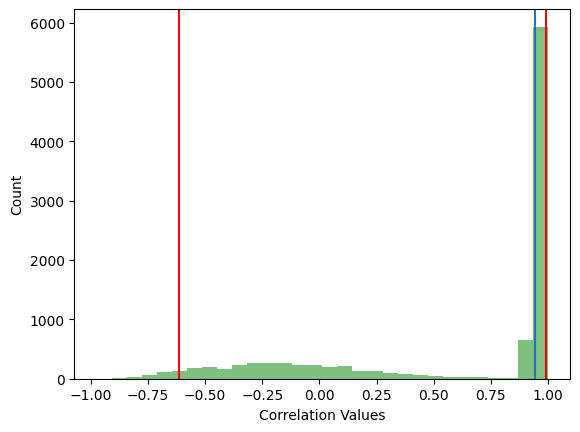

In [7]:
plt.hist(corr, bins=30, color='g', alpha=0.5)
plt.axvline(x=cis[0], color='r')
plt.axvline(x=cis[1], color='r')
plt.axvline(x=rval)
plt.xlabel("Correlation Values")
plt.ylabel("Count")
plt.show()